## TOC

### 1. Loading and Understanding the Data
### 2. Reading the Data in
### 3. Prepare Multiple Regression Model
### 4. Evaluate the model on training data
### 5.  using the model on test data
### 6. Some additional practice and play

In [15]:
# Import packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

%matplotlib inline

In [2]:
# Use curl to download the data from IBM Object storage
# What does the -o flag do? Ans: It appears that the output of the curl is tabular whereas without the -o flag the output
# of curl is the original csv file

!curl https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv -o FuelConsumption.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72629  100 72629    0     0   201k      0 --:--:-- --:--:-- --:--:--  201k


### Data Description

WE have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source is: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd6

MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUELTYPE e.g. z
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [6]:
# Read the data into a dataframe and look at the dataset and its size

df = pd.read_csv("FuelConsumption.csv")
df.shape, display(df.head()) # The display() function displays the dataframe in a neat tabular structure

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


((1067, 13), None)

In [8]:
# Always summarize the data to get a statistical look at the variables

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
# Select some features we want to use for regression and create another dataframe to hold these features

cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
type(cdf), cdf.head()

(pandas.core.frame.DataFrame,
    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
 0         2.0          4                   8.5           196
 1         2.4          4                   9.6           221
 2         1.5          4                   5.9           136
 3         3.5          6                  11.1           255
 4         3.5          6                  10.6           244)

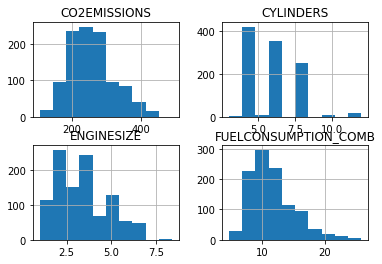

In [11]:
# Plot histograms various variables agains each other

viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

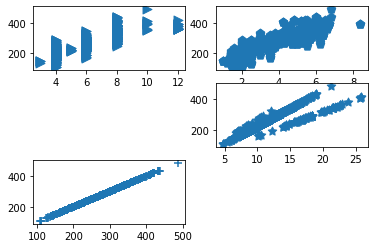

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801) # my not need it

# The definitions for x,y,z are for test use the cdf.xxxx for x and y axes
# x = np.random.rand(10)
# y = np.random.rand(10)
# z = np.sqrt(x**2 + y**2)

plt.subplot(321)
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, s=80, marker=">")

plt.subplot(322)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, s=80, marker=(5, 0))

# verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
# plt.subplot(323)
# plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, s=80, marker=verts)

plt.subplot(324)
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, s=80, marker=(5, 1))

plt.subplot(325)
plt.scatter(cdf.CO2EMISSIONS, cdf.CO2EMISSIONS, s=80, marker='+')

# plt.subplot(326)
# plt.scatter(x, y, s=80, marker=(5, 2))

plt.show()

In [13]:
# Find the correlation of CO2EMISSIONS against each feature chosen for the model

cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


In [20]:
# Create Train and Test datases

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
t.shape

(855, 4)

### Polynomial Regression

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

𝑦=𝑏+𝜃1𝑥+𝜃2𝑥2 
Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1,  𝑥 , and  𝑥2 .

PloynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2

In [18]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly, train_x_poly.shape

(array([[ 1.  ,  2.  ,  4.  ],
        [ 1.  ,  2.4 ,  5.76],
        [ 1.  ,  1.5 ,  2.25],
        ...,
        [ 1.  ,  3.2 , 10.24],
        [ 1.  ,  3.  ,  9.  ],
        [ 1.  ,  3.2 , 10.24]]),
 (843, 3))

fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
=
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

In our example:
$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  𝑥  with  𝑥1 ,  𝑥21  with  𝑥2 , and so on. Then the degree 2 equation would be turn into:

𝑦=𝑏+𝜃1𝑥1+𝜃2𝑥2 
Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.

so we can use LinearRegression() function to solve it

In [21]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.0557948  -1.51632344]]
Intercept:  [108.35925175]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

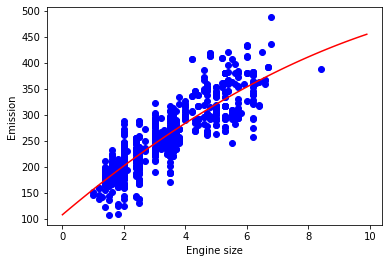

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [23]:
# Evaluation

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 25.59
Residual sum of squares (MSE): 1076.42
R2-score: 0.64


#### Practice

Use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

Coefficients:  [[ 0.         33.28902702  3.10941403 -0.37799595]]
Intercept:  [126.3655512]
Mean absolute error: 22.14
Residual sum of squares (MSE): 825.60
R2-score: 0.75


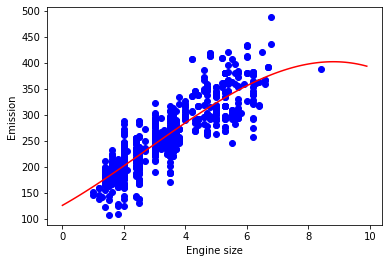

In [29]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly, train_x_poly.shape

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2) + clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluation

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )